In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib

from mycolorpy import colorlist as mcp

from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

In [5]:
color1=mcp.gen_color(cmap="tab20c",n=11)
print(color1)

['#3182bd', '#9ecae1', '#e6550d', '#fdae6b', '#31a354', '#a1d99b', '#756bb1', '#bcbddc', '#636363', '#bdbdbd', '#d9d9d9']


In [6]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.f million' % (x * 1e-6)

formatter = FuncFormatter(millions)

In [7]:
absolute = pd.read_csv('../data/fig1_2005-2024_yearly_edits_contributors_new_data.csv')

In [40]:
# edit data
percentage_edits = pd.read_csv('../data/fig1_top10_corpos_percentage_edits_based_on_total_edits_newData.csv')
percentage_edits = percentage_edits.drop(columns={'Unnamed: 0'})

edits_tot = absolute.copy().rename(columns={'edits_CE': 'edits_corporate', 'edits_total': 'edits_total'})
edits_tot = edits_tot[['year', 'edits_corporate', 'edits_total']].copy().tail(9).head(9)

In [30]:
#contributor data
percentage_contributors = pd.read_csv('../data/fig1_top10_corpos_percentage_contributors_based_on_total_edits_newData_updateOrder.csv')
percentage_contributors = percentage_contributors.drop(columns={'Unnamed: 0'})

contributors_tot = absolute.copy().rename(columns={'contributors_CE': 'contributors_corporate', 'contributors_total': 'contributors_total'})
contributors_tot = contributors_tot[['year', 'contributors_corporate', 'contributors_total']].copy().tail(9).head(9)

In [11]:
# function to add value labels
def addlabels(ax, x, y):
	for i in range(len(x)):
		ax.text(i, y[i] , y[i], ha = 'right')


In [12]:
unique_columns = set(list(percentage_contributors.keys()) + list(percentage_edits.keys()))

# Generate a custom colormap where each unique column gets a unique color
custom_colormap = {col: plt.cm.tab20c(i) for i, col in enumerate(unique_columns)}

In [44]:
rename_dict = {
    "adt": "Apple",
    "amap": "Amazon",
    "tomtom": "TomTom",
    "MSFTOpenMaps": "Microsoft",
    "grab": "Grab",
    "mapbox": "Mapbox",
    "expedia":"Expedia"
}

percentage_edits = percentage_edits.rename(
    columns=rename_dict
)
percentage_edits.sort_index(axis=1, inplace=True)


percentage_contributors = percentage_contributors.rename(
    columns=rename_dict
)
percentage_contributors.sort_index(axis=1, inplace=True)

display(percentage_edits)
display(percentage_contributors)

,Amazon,Apple,DigitalEgypt,Grab,Kaart,Lyft,Mapbox,Meta,Microsoft,Other,TomTom,year
0,0.023368,0.003557,0.000000,0.018813,1.037538,0.000000,0.045352,0.003090,0.000042,0.460199,3.365790e-04,2016
1,0.124870,0.064877,0.000000,0.125305,1.150267,0.000000,0.033893,0.232393,0.005376,0.365424,5.370143e-02,2017
2,0.241361,0.480260,0.000727,0.212369,1.665293,0.008121,0.012354,1.104104,0.138850,0.772763,4.963560e-03,2018
3,1.745078,0.904523,1.278633,0.322519,3.751899,0.150046,0.043452,1.909550,0.335638,0.444219,8.757782e-07,2019
4,2.571690,5.129945,0.811711,0.320339,2.878341,0.044510,0.079666,2.467541,0.396562,0.338762,8.901022e-06,2020
5,2.020114,4.042178,0.307805,0.729527,1.830456,0.068665,0.138854,3.554337,0.277329,0.190919,1.866188e-01,2021
6,0.350537,1.409431,0.448635,0.394411,1.729083,0.300605,0.116931,2.979715,0.166009,0.388029,2.652191e-01,2022
7,0.210886,1.175923,0.286915,0.224560,1.053905,0.321333,0.078993,1.074001,0.161698,0.263969,3.498110e-01,2023
8,0.077110,1.144748,0.286803,0.136173,0.865671,0.251220,0.042065,0.100254,0.136583,0.184537,2.176451e-01,2024


,Amazon,Apple,Expedia,Grab,Kaart,Mapbox,Meta,Microsoft,Other,TomTom,Uber,year
0,0.111819,0.001153,0.026514,0.001153,0.017676,0.031893,0.000384,0.000384,0.009991,0.003458,0.000000,2016
1,0.286780,0.010377,0.058488,0.030187,0.022641,0.020125,0.007547,0.000943,0.012578,0.201563,0.000629,2017
2,0.140879,0.021849,0.034567,0.057721,0.108268,0.010109,0.027719,0.003913,0.028045,0.000652,0.028371,2018
3,0.256703,0.036621,0.001067,0.164972,0.162128,0.012089,0.043732,0.004978,0.051554,0.000356,0.027377,2019
4,0.356656,0.369853,0.000330,0.060048,0.137582,0.026395,0.058398,0.015507,0.051139,0.000660,0.006929,2020
5,0.792798,0.392815,0.002730,0.145727,0.124568,0.032422,0.057677,0.013993,0.057335,0.036176,0.002389,2021
6,0.572422,0.221770,0.004644,0.121528,0.064634,0.040251,0.084373,0.013159,0.072375,0.108369,0.002709,2022
7,0.449100,0.172587,0.004877,0.093797,0.044272,0.040895,0.055528,0.012006,0.061156,0.046523,0.001126,2023
8,0.284515,0.185184,0.004492,0.064390,0.078366,0.038934,0.028451,0.011980,0.051911,0.047918,0.000499,2024


In [45]:
percentage_edits = percentage_edits[['Apple', 'Kaart', 'Meta', 'Amazon', 'DigitalEgypt', 'Grab', 'Microsoft', 'Lyft', 'TomTom', 'Mapbox', 'Other', 'year']]
percentage_contributors = percentage_contributors[['Amazon', 'Apple', 'Kaart', 'Grab', 'TomTom', 'Meta', 'Mapbox', 'Expedia', 'Microsoft', 'Uber', 'Other', 'year']]


In [46]:
display(percentage_edits)
display(percentage_contributors)

,Apple,Kaart,Meta,Amazon,DigitalEgypt,Grab,Microsoft,Lyft,TomTom,Mapbox,Other,year
0,0.003557,1.037538,0.003090,0.023368,0.000000,0.018813,0.000042,0.000000,3.365790e-04,0.045352,0.460199,2016
1,0.064877,1.150267,0.232393,0.124870,0.000000,0.125305,0.005376,0.000000,5.370143e-02,0.033893,0.365424,2017
2,0.480260,1.665293,1.104104,0.241361,0.000727,0.212369,0.138850,0.008121,4.963560e-03,0.012354,0.772763,2018
3,0.904523,3.751899,1.909550,1.745078,1.278633,0.322519,0.335638,0.150046,8.757782e-07,0.043452,0.444219,2019
4,5.129945,2.878341,2.467541,2.571690,0.811711,0.320339,0.396562,0.044510,8.901022e-06,0.079666,0.338762,2020
5,4.042178,1.830456,3.554337,2.020114,0.307805,0.729527,0.277329,0.068665,1.866188e-01,0.138854,0.190919,2021
6,1.409431,1.729083,2.979715,0.350537,0.448635,0.394411,0.166009,0.300605,2.652191e-01,0.116931,0.388029,2022
7,1.175923,1.053905,1.074001,0.210886,0.286915,0.224560,0.161698,0.321333,3.498110e-01,0.078993,0.263969,2023
8,1.144748,0.865671,0.100254,0.077110,0.286803,0.136173,0.136583,0.251220,2.176451e-01,0.042065,0.184537,2024


,Amazon,Apple,Kaart,Grab,TomTom,Meta,Mapbox,Expedia,Microsoft,Uber,Other,year
0,0.111819,0.001153,0.017676,0.001153,0.003458,0.000384,0.031893,0.026514,0.000384,0.000000,0.009991,2016
1,0.286780,0.010377,0.022641,0.030187,0.201563,0.007547,0.020125,0.058488,0.000943,0.000629,0.012578,2017
2,0.140879,0.021849,0.108268,0.057721,0.000652,0.027719,0.010109,0.034567,0.003913,0.028371,0.028045,2018
3,0.256703,0.036621,0.162128,0.164972,0.000356,0.043732,0.012089,0.001067,0.004978,0.027377,0.051554,2019
4,0.356656,0.369853,0.137582,0.060048,0.000660,0.058398,0.026395,0.000330,0.015507,0.006929,0.051139,2020
5,0.792798,0.392815,0.124568,0.145727,0.036176,0.057677,0.032422,0.002730,0.013993,0.002389,0.057335,2021
6,0.572422,0.221770,0.064634,0.121528,0.108369,0.084373,0.040251,0.004644,0.013159,0.002709,0.072375,2022
7,0.449100,0.172587,0.044272,0.093797,0.046523,0.055528,0.040895,0.004877,0.012006,0.001126,0.061156,2023
8,0.284515,0.185184,0.078366,0.064390,0.047918,0.028451,0.038934,0.004492,0.011980,0.000499,0.051911,2024


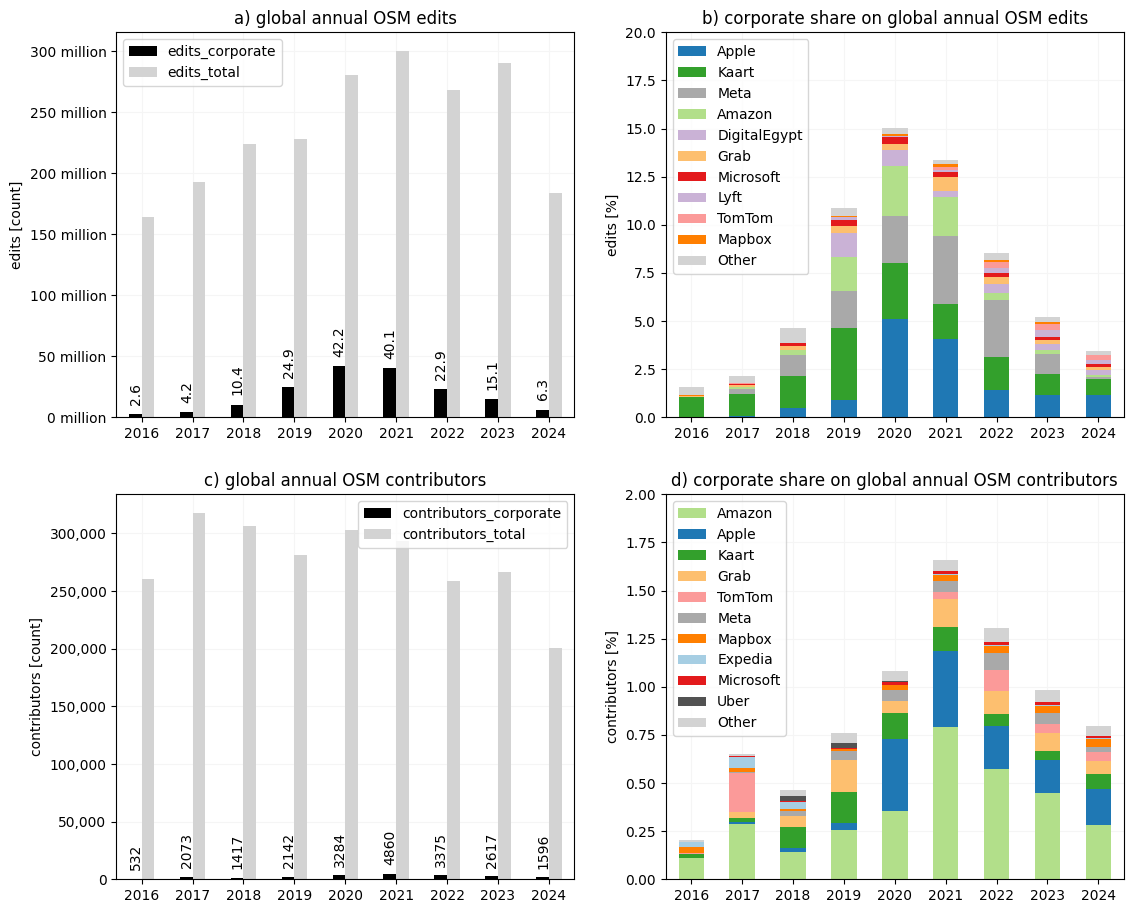

In [57]:
# creating a figure with 2 suplots
fig, axs = plt.subplots(2, 2, figsize=(13, 11))

custom_colormap = {
    'Meta': 'darkgrey',
    'Apple': '#1f78b4',
    'Amazon': '#b2df8a',
    'Kaart': '#33a02c',
    'TomTom': '#fb9a99',
    'Microsoft': '#e31a1c',
    'DigitalEgypt': '#cab2d6',
    'Grab': '#fdbf6f',
    'Mapbox': '#ff7f00',
    'Lyft': '#cab2d6',
    'Expedia':'#a6cee3' ,
    'Uber': '#525252',
    'Other': 'lightgrey',
}


bar_labels_contributors = ['contributors_corporate', 'contributors_total']
bar_labels_edits = ['edits_corporate', 'edits_total']

bar_colors = ['black', 'lightgrey']
ax1 = axs[0, 0]

edits_tot.plot.bar(
    x='year',
    label=bar_labels_edits,
    color=bar_colors,
    ax=ax1,
    rot=0,
    xlabel=''
)
ax1.set_ylabel('edits [count]')
ax1.set_title('a) global annual OSM edits')
ax1.grid(color="whitesmoke")
ax1.yaxis.set_major_formatter(formatter)
ax1.set_axisbelow(True)


# the second subplot (right)
ax2 = axs[0, 1]
percentage_edits.plot.bar(
    x='year',
    stacked = True,
    color=[custom_colormap[col] for col in percentage_edits.loc[:, percentage_edits.columns != 'year']],
    ax=ax2,
    rot=0,
    xlabel=''
)
ax2.set_title('b) corporate share on global annual OSM edits')
ax2.set_ylabel('edits [%]')
ax2.set_ylim([0, 20])
ax2.grid(color="whitesmoke")
ax2.set_axisbelow(True)


ax3 = axs[1, 0]
contributors_tot.plot.bar(
    x='year',
    label=bar_labels_contributors,
    color=bar_colors,
    ax=ax3,
    rot=0,
    xlabel=''
)
ax3.set_ylabel('contributors [count]')
ax3.set_title('c) global annual OSM contributors')
ax3.grid(color="whitesmoke")
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax3.set_axisbelow(True)


# the second subplot (right)
ax4 = axs[1, 1]
percentage_contributors.plot.bar(
    x='year',
    stacked=True,
    color=[custom_colormap[col] for col in percentage_contributors.loc[:, percentage_contributors.columns != 'year']],
    ax=ax4,
    rot=0,
    xlabel=''
)

ax4.set_title('d) corporate share on global annual OSM contributors')
ax4.set_ylabel('contributors [%]')
ax4.set_ylim([0, 2])
ax4.grid(color="whitesmoke")
ax4.set_axisbelow(True)



df_annot = contributors_tot.copy()
df_annot.reset_index(inplace=True)
for i in range(0, len(df_annot)):
    ax3.annotate(
        int(df_annot["contributors_corporate"][i]),
        xy= (
            i - 0.25,
            df_annot["contributors_corporate"][i] +10000),
        rotation=90
    )


df_annot = edits_tot.copy()
df_annot.reset_index(inplace=True)
for i in range(0, len(df_annot)):
    ax1.annotate(
        round(df_annot["edits_corporate"][i] / 1_000_000, 1),
        xy= (
            i - 0.25,
            df_annot["edits_corporate"][i] + 10_000_000),
        rotation=90
    )



plt.savefig(
    "../figures/fig1_annual_map_editsv2.png",
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white'
)
plt.show()


# data until: 2024-09-01